# Data Visualization using Seaborn

* Seaborn is a statistical plotting library
* It has beautiful default styles
* It also designed to work very well with pandas dataframe objects

## Distribution Plots

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline
#To display the plots inside the jupyter notebook

##### Seaborn comes with inbuilt datasets

In [5]:
sns.get_dataset_names() #You can obtain list of available datasets using this method

C:\Users\rpannuru\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\rpannuru\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distribution plot

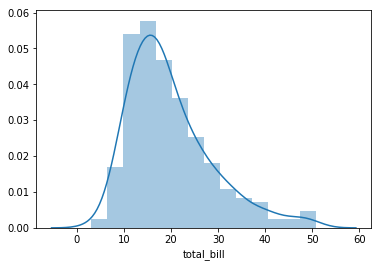

In [26]:
sns.distplot(tips['total_bill'])

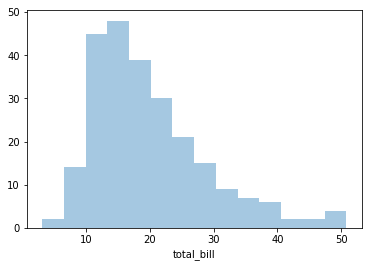

In [25]:
sns.distplot(tips['total_bill'], kde = False)
#This is a histogram
#By this we can analyse that most of the bills are between 10 to 20 dolors

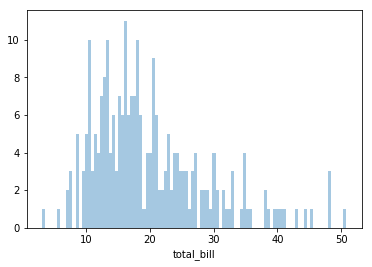

In [28]:
sns.distplot(tips['total_bill'], kde = False, bins= 100)
#we can specify number of bins(bars) to show in plot

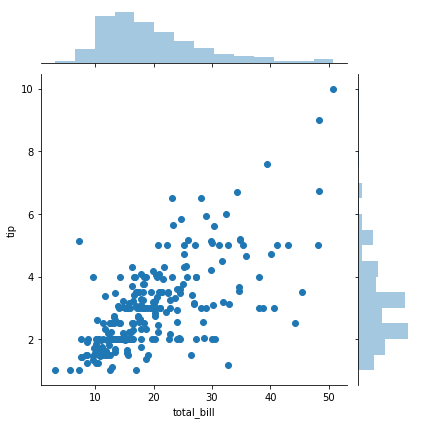

In [31]:
sns.jointplot(x = 'total_bill', y = 'tip', data=tips)
#We can see total_bill on the X axis, tip on the Y axis and inbetween we can see scatter plot.
#by seeing this scatter plot we can see that tip increases with total_bill.

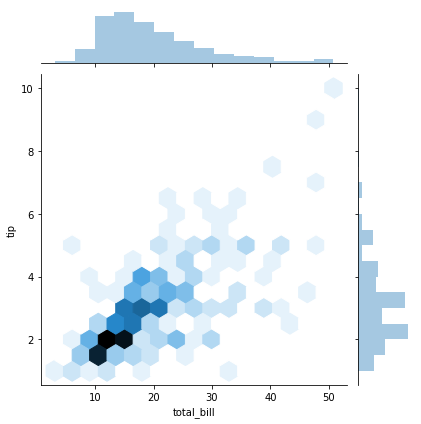

In [34]:
sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind='hex')
#in this we use kind='hex' which is hexagon representation of scatter with which we get thicker hexagon in the area of lot of scatters

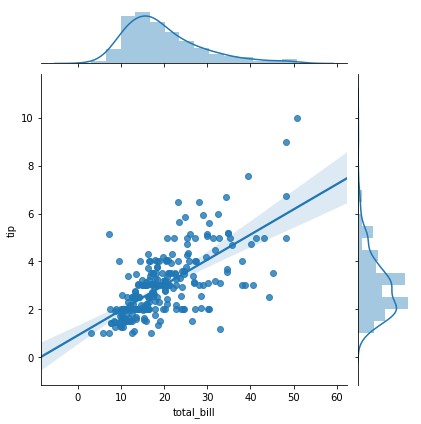

In [36]:
sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind='reg')
#here we use kind='reg' which will show the regression line(linear regression)

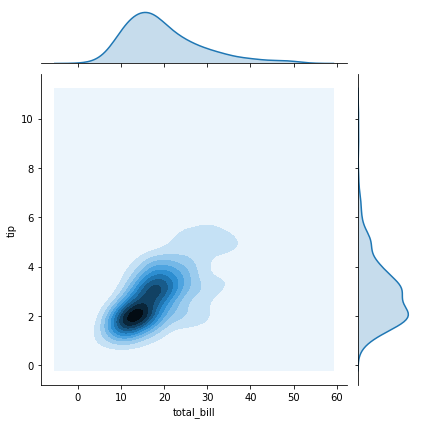

In [39]:
sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind='kde')
#here we use kind='kde' which will show the density where X, Y match the most

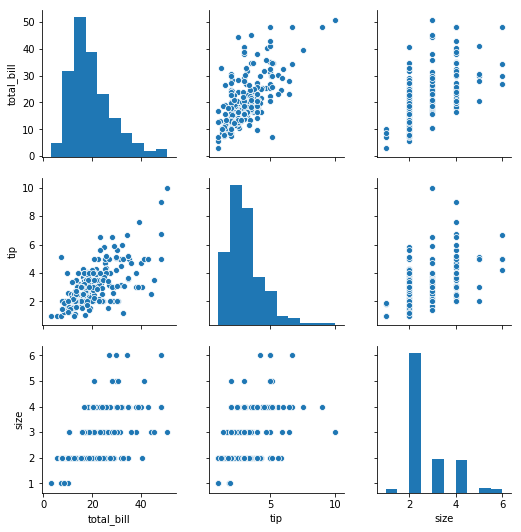

In [14]:
sns.pairplot(tips)
#This will show the plot for each pair of dataframe
#This is a jointplot for every single numerical column in the dataset

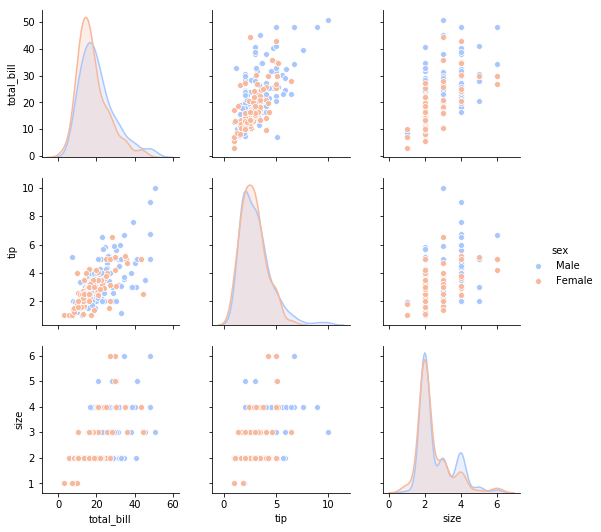

In [45]:
sns.pairplot(tips, hue='sex', palette='coolwarm')
#hue will seperate the color based on the category(here we mention sex(male/female))
#palette will provide the color based on the parameter we given

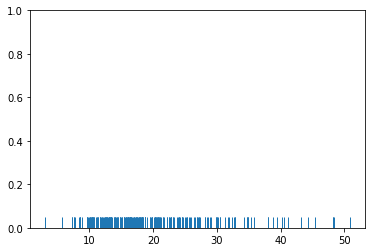

In [48]:
sns.rugplot(tips['total_bill']) 
#This will display a line for every instance of the column along the distribution line

### kde plots
* kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

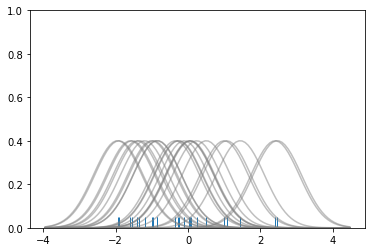

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

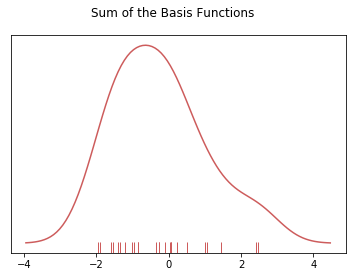

In [7]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

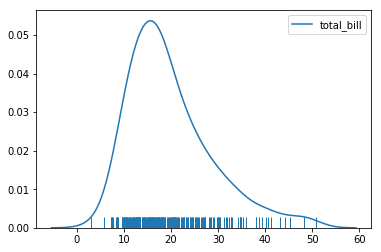

In [12]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

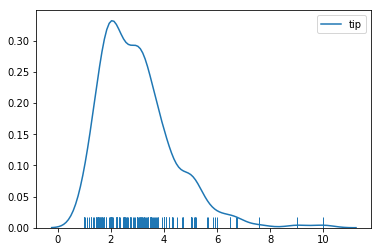

In [13]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## Categorical Plots

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
import numpy as np

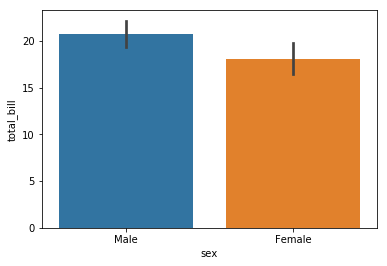

In [21]:
sns.barplot(x="sex", y="total_bill", data=tips) #using category of sex here

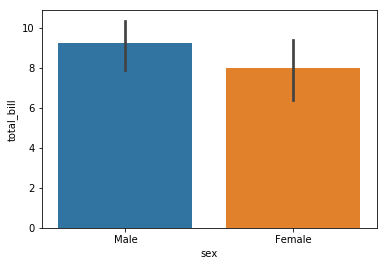

In [22]:
sns.barplot(x="sex", y="total_bill", data=tips, estimator=np.std)
#estimator-can use the statistical function to estimate within each categorical bin.

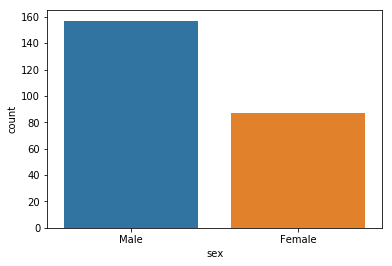

In [25]:
sns.countplot(x='sex', data=tips)
#Y axies will count and show the number of occurances

## Box Plots and Violin Plots

boxplots and violinplots are used to shown the distribution of categorical data.

### Box Plot:

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

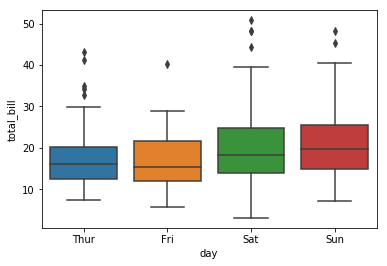

In [11]:
sns.boxplot(x = 'day', y = 'total_bill', data=tips)
#In the box plots the middle line of the box is the median and edges of the box is median of lower and upper data which seperated by median. 
#The lines are called as whiskers
#and edges of the whiskers are lower and upper parts of the data.
#The remaining dots are outliers which looks different from remaining data.

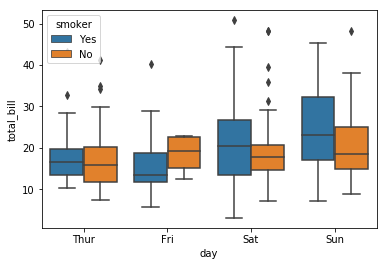

In [15]:
sns.boxplot(x = 'day', y = 'total_bill', data=tips, hue='smoker')
# This hue shows the difference box plots for smokers and non smokers

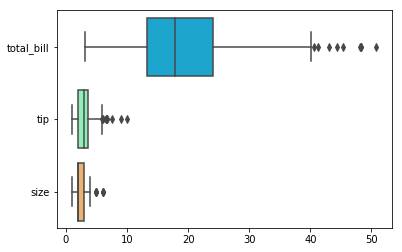

In [19]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips, orient='h', palette='rainbow')

### Violin Plot:

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

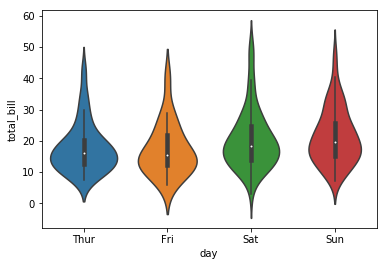

In [10]:
sns.violinplot(x='day', y = 'total_bill', data=tips)

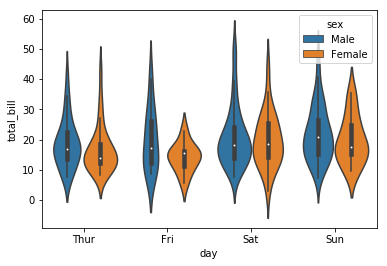

In [13]:
sns.violinplot(x='day', y = 'total_bill', data=tips, hue='sex')

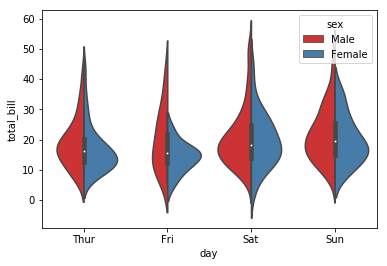

In [20]:
sns.violinplot(x='day', y = 'total_bill', data=tips, hue='sex', split=True, palette='Set1')
#Splits the comparitive column or category in the same plot

## stripplot and swarmplot

### stripplot

The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

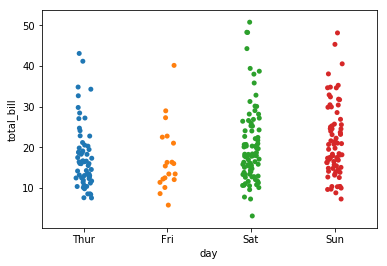

In [22]:
sns.stripplot(x='day', y = 'total_bill', data=tips)

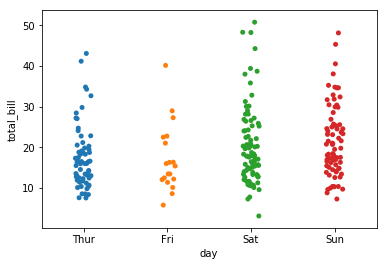

In [24]:
sns.stripplot(x='day', y = 'total_bill', data=tips, jitter=True)
#By using jitter we can see the density in better way

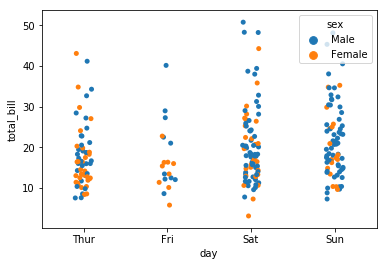

In [25]:
sns.stripplot(x='day', y = 'total_bill', data=tips, jitter=True, hue='sex')

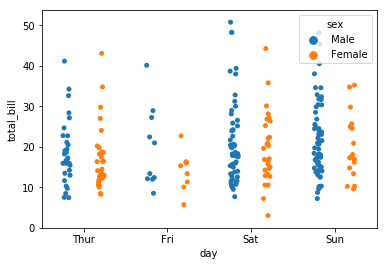

In [34]:
sns.stripplot(x='day', y = 'total_bill', data=tips, jitter=True, hue='sex', dodge=True)
#We can use split which is older(replced by dodge)

### swarmplot

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

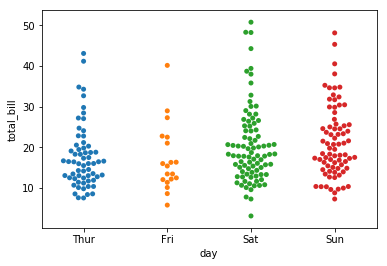

In [38]:
sns.swarmplot(x='day', y = 'total_bill', data=tips)
#It looks like the combination of stripplot and violin plot

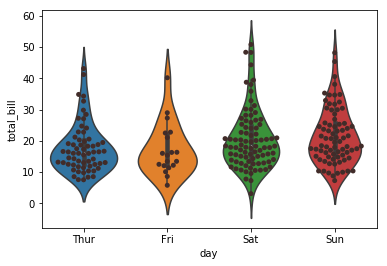

In [49]:
sns.violinplot(x='day', y = 'total_bill', data=tips)
sns.swarmplot(x='day', y = 'total_bill', data=tips, color='#412C29')

#we can combine two plots to understand the data distribution.

### factorPlot or catplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

C:\Users\rpannuru\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


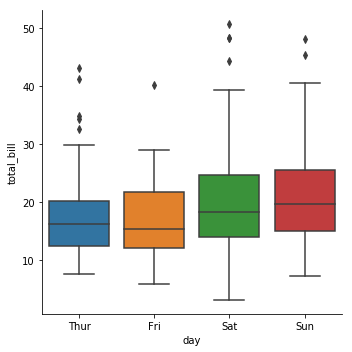

In [56]:
sns.factorplot(x='day', y = 'total_bill', data=tips, kind='box')
#we can specify which type of plot we need by passing proper value the kind parameter

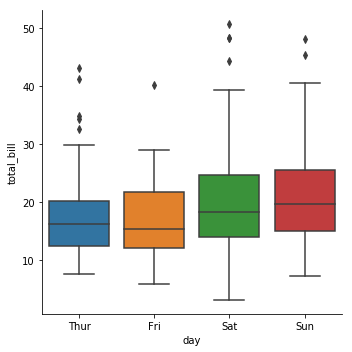

In [54]:
sns.catplot(x='day', y = 'total_bill', data=tips, kind='box')

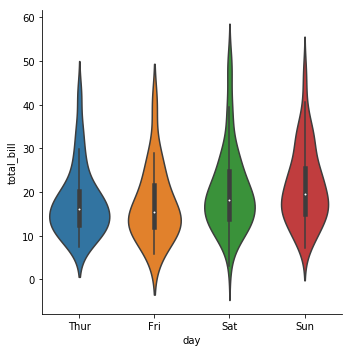

In [55]:
sns.catplot(x='day', y = 'total_bill', data=tips, kind='violin')

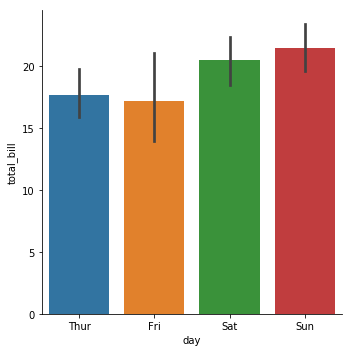

In [57]:
sns.catplot(x='day', y = 'total_bill', data=tips, kind='bar')

## Matrix Plots

In [3]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [10]:
tc = tips.corr()#Correlation between every numerical column data

In [11]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


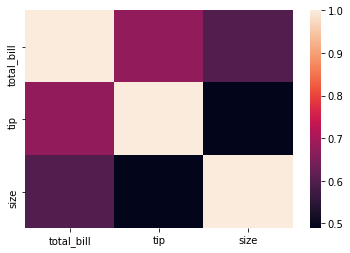

In [9]:
sns.heatmap(tc) #heatmap will show visually based on the value of correlation

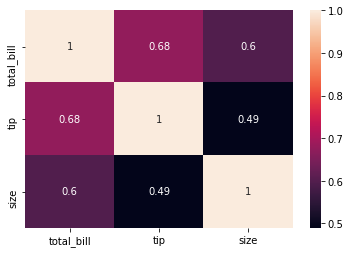

In [13]:
sns.heatmap(tc, annot=True) #heatmap will show visually based on the value of correlation and the value will be pasted on the box of each comparition

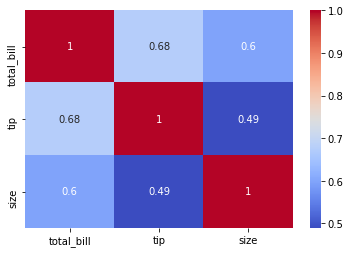

In [14]:
sns.heatmap(tc, annot=True, cmap='coolwarm') 

In [16]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [18]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

In [19]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


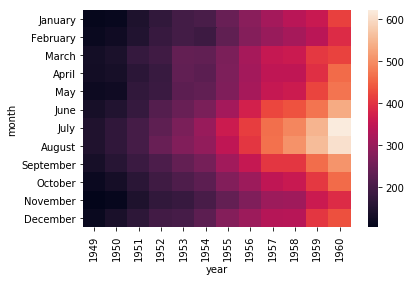

In [20]:
sns.heatmap(fp)

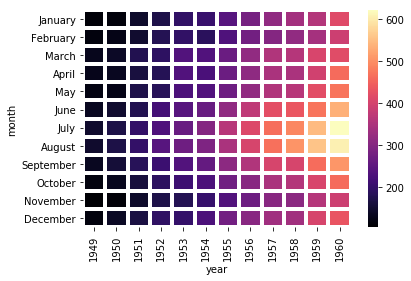

In [23]:
sns.heatmap(fp, cmap='magma', linecolor='white', linewidth=3)

#### clustermap

Plot a matrix dataset as a hierarchically-clustered heatmap.

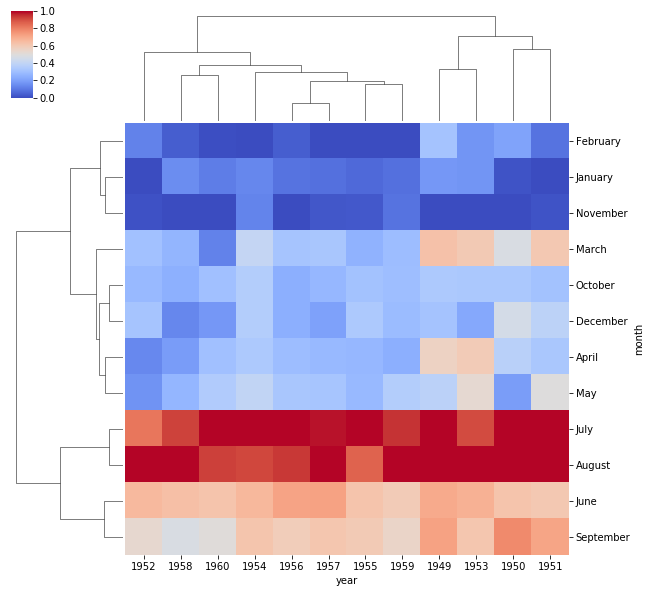

In [29]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1) #It will arrage the rows and columns similar groups are closer to eachother

## Grid Plots

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [31]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

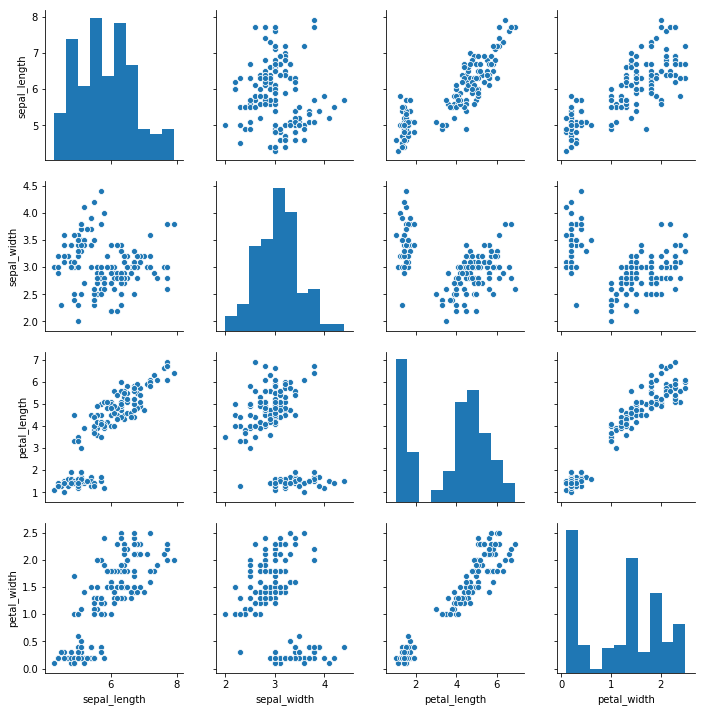

In [35]:
sns.pairplot(iris)

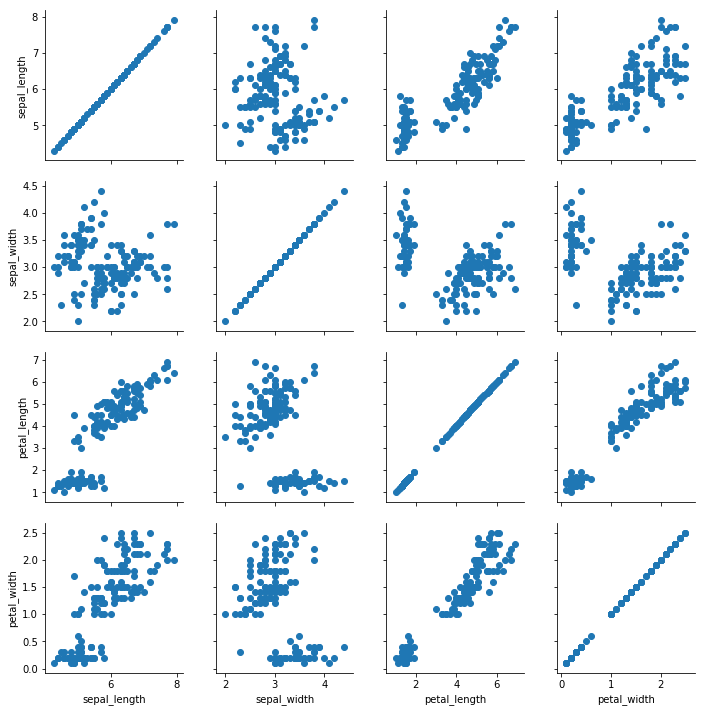

In [47]:
#Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.
g = sns.PairGrid(iris)
g.map(plt.scatter)

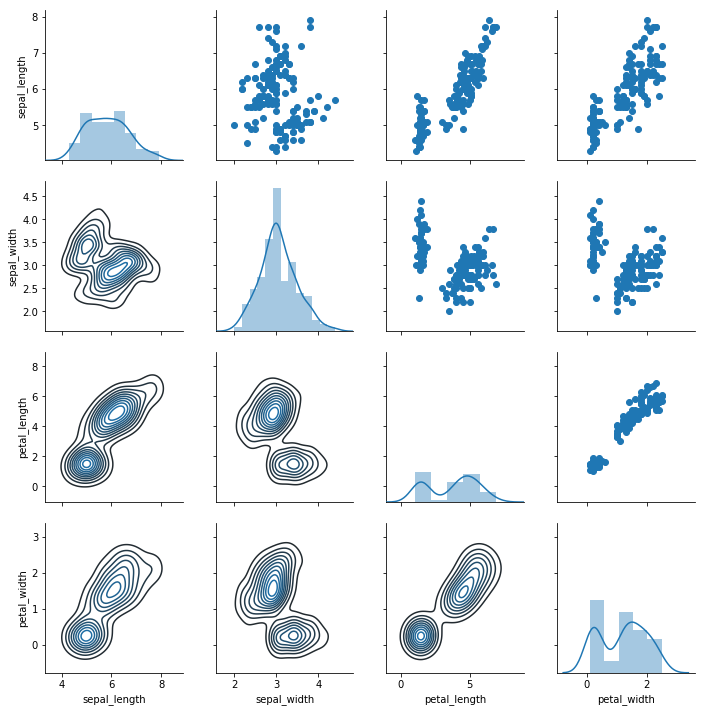

In [43]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

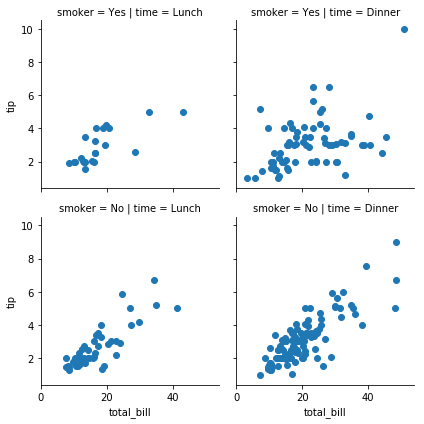

In [48]:
#FacetGrid is the general way to create grids of plots based off of a feature:
g2 = sns.FacetGrid(data=tips, col='time', row='smoker')
g2.map(plt.scatter, 'total_bill', 'tip')

### JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example

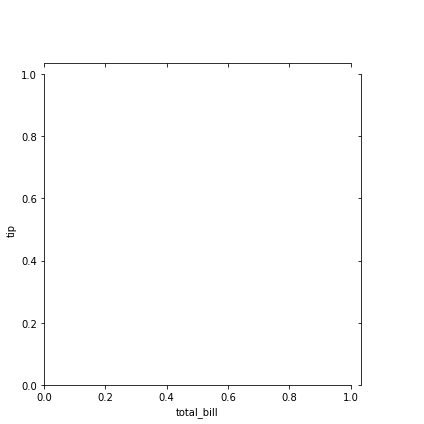

In [51]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

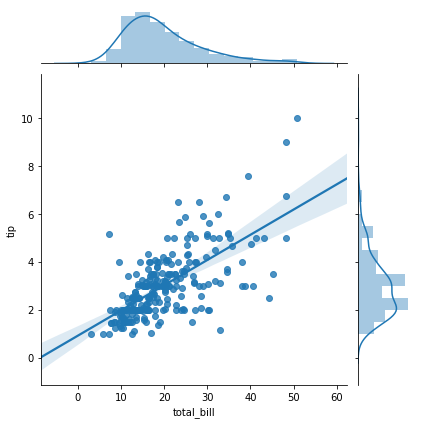

In [52]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

## Regression plot

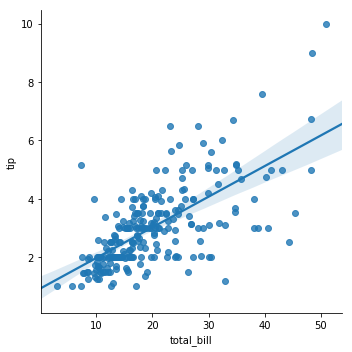

In [53]:
sns.lmplot(x="total_bill", y='tip', data=tips)
#Linear model plot

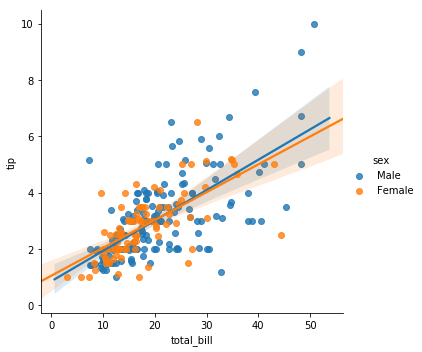

In [7]:
sns.lmplot(x="total_bill", y='tip', data=tips, hue='sex')

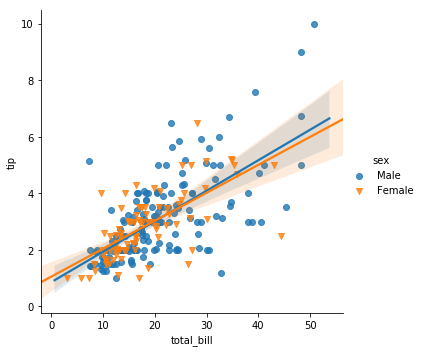

In [17]:
sns.lmplot(x="total_bill", y='tip', data=tips, hue='sex', markers=['o', 'v'])
#using the markers of matplotlib for hue parameter

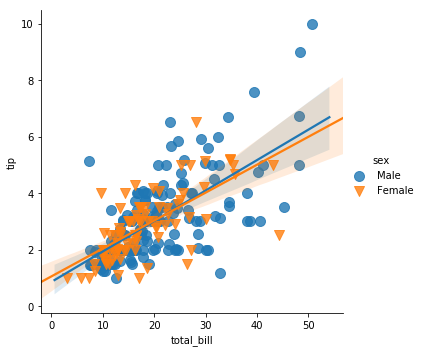

In [14]:
sns.lmplot(x="total_bill", y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s':100})
#making scatter_kws={'s':value} increase the size of scatter

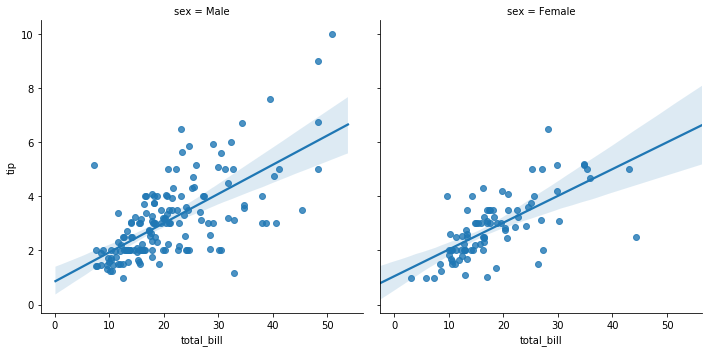

In [13]:
sns.lmplot(x="total_bill", y='tip', data=tips, col='sex')
#Seperating by columns using col parameter

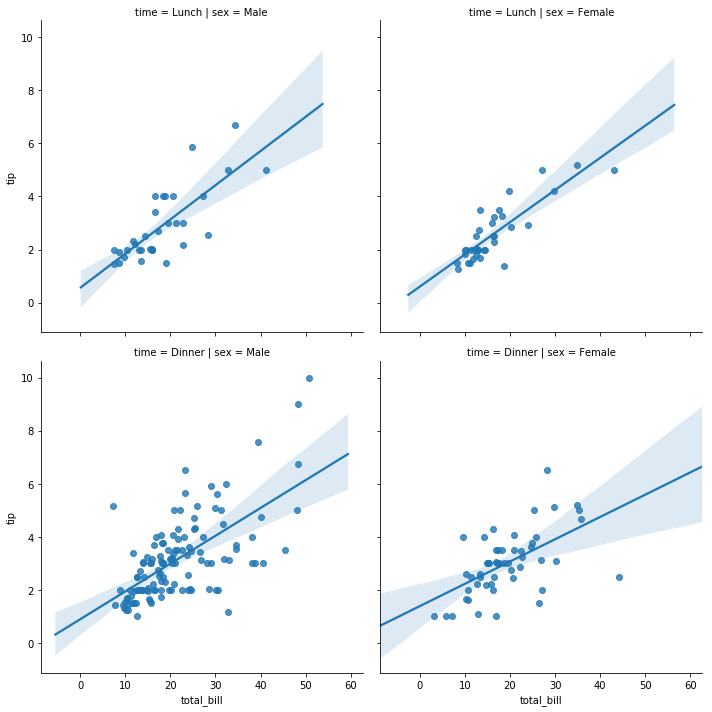

In [19]:
sns.lmplot(x="total_bill", y='tip', data=tips, col='sex', row='time')
#can use row as well

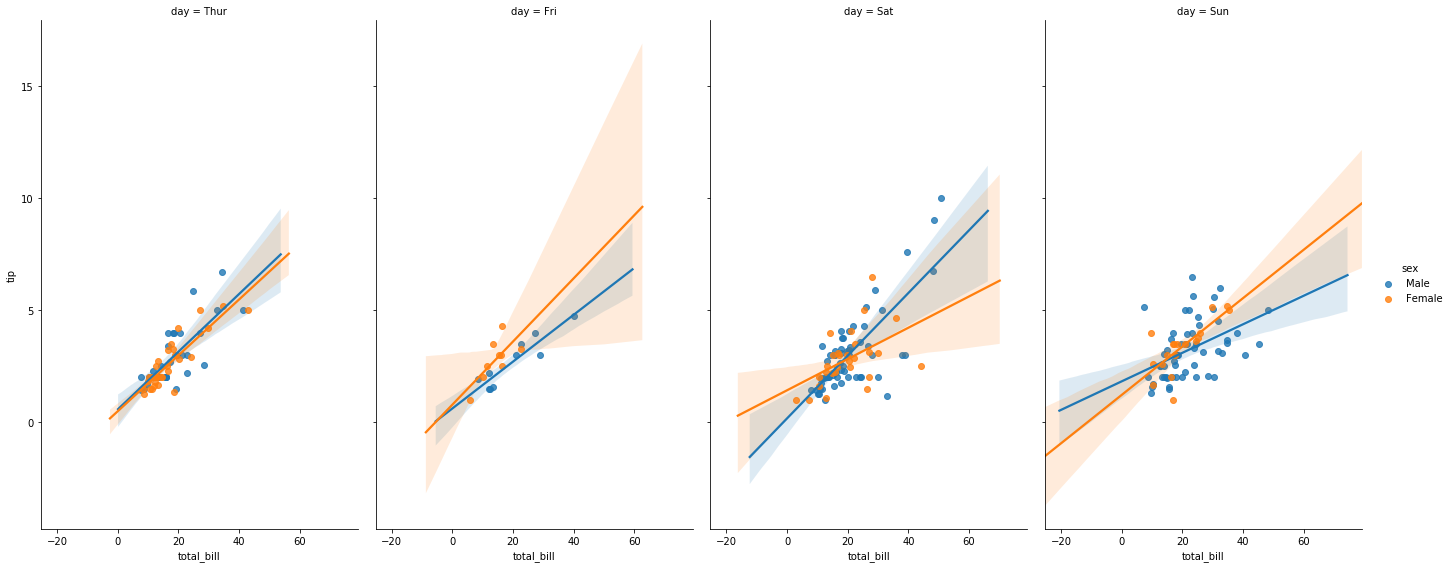

In [27]:
sns.lmplot(x="total_bill", y='tip', data=tips, col='day', hue='sex', aspect=0.6, height=8)
#we can use aspect ratio and height aswell

## Style and color

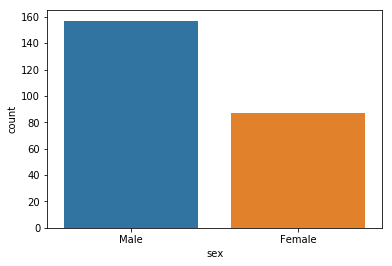

In [29]:
sns.countplot(x='sex', data=tips)

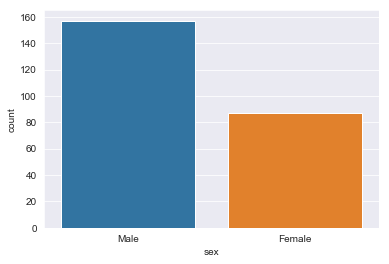

In [33]:
sns.set_style('darkgrid')
sns.countplot(x='sex', data=tips)

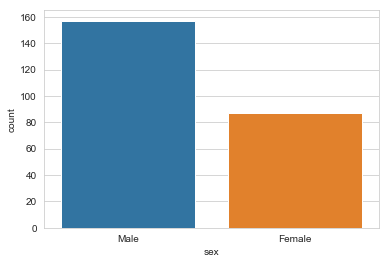

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

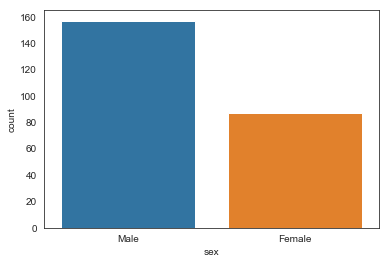

In [31]:
sns.set_style('white')
sns.countplot(x='sex', data=tips)

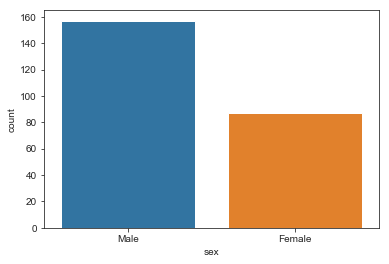

In [32]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)

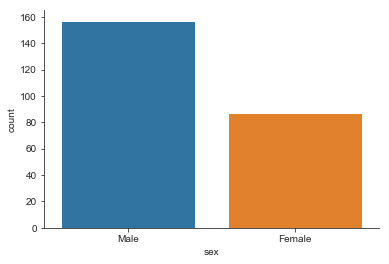

In [35]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
sns.despine()

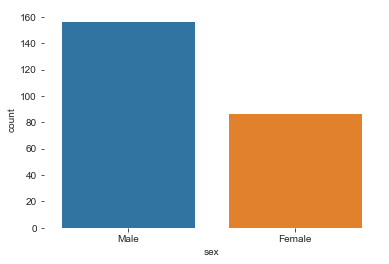

In [36]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom = True)

We can use matplotlib's *plt.figure(figsize=(width,height) * to change the size of most seaborn plots.

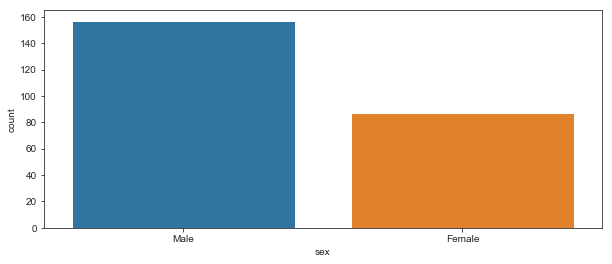

In [37]:
plt.figure(figsize=(10, 4))
sns.countplot(x='sex', data=tips)

The set_context() allows you to override default parameters

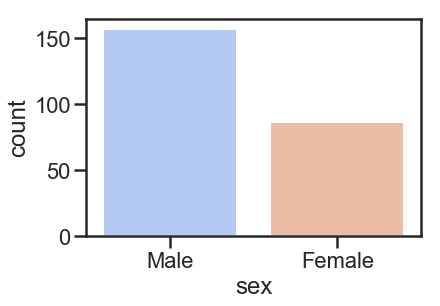

In [39]:
sns.set_context('poster')
sns.countplot(x='sex',data=tips,palette='coolwarm')

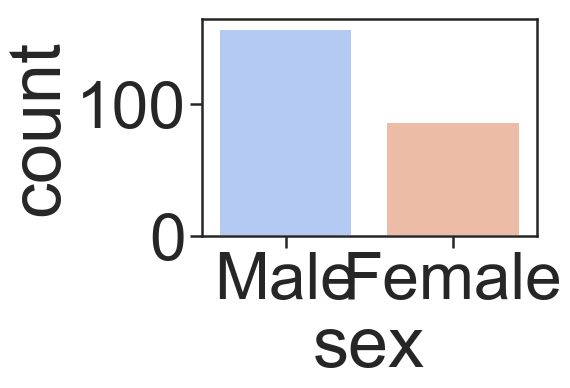

In [40]:
sns.set_context('poster', font_scale=3)
sns.countplot(x='sex',data=tips,palette='coolwarm')

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

we can pass palette parameter with values using the above link or using "matplotlib colormaps" documentation

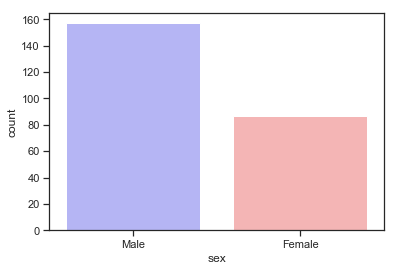

In [46]:
sns.set_context('notebook')
sns.countplot(x='sex',data=tips,palette='bwr')